In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns

# Periodo Referencia

In [2]:
basepath = "/media/jonathan/JHON/Tesis/DatosTesis/Importantes_3erAvance/Trayectos_Periodo_Referencia2.csv"
data = pd.read_csv(basepath, sep=',', index_col='ds', parse_dates=True)   
# data.head()
trayecto = data[['2807905-2807901']]
trayecto.head()

,2807905-2807901
ds,
2020-02-14 00:00:00,308.104
2020-02-14 01:00:00,165.496
2020-02-14 02:00:00,179.838
2020-02-14 03:00:00,130.675
2020-02-14 04:00:00,123.672


In [3]:
# lof = LocalOutlierFactor(n_neighbors=40, contamination=0.1)
# outliers = lof.fit_predict(trayecto)
# trayecto['outlier'] = outliers

# plt.figure(figsize=(12, 6))
# plt.plot(trayecto.index, trayecto['2807905-2807901'], label='Desplazamiento')
# plt.scatter(trayecto[trayecto['outlier'] == -1].index, trayecto[trayecto['outlier'] == -1]['2807905-2807901'], color='red', label='Outliers')
# plt.xlabel('Fecha')
# plt.ylabel('Desplazamiento')
# plt.title('Serie Temporal de Desplazamiento con Outliers Identificados por LOF')
# plt.legend()
# plt.show()

# Normalizada

In [4]:
# lof = LocalOutlierFactor(n_neighbors=30, contamination=0.06)
# normalized_df = (trayecto-trayecto.mean())/trayecto.std()
# outliers = lof.fit_predict(normalized_df)
# normalized_df['outlier'] = outliers

# plt.figure(figsize=(12, 6))
# plt.plot(normalized_df.index, normalized_df['2807905-2807901'], label='Desplazamiento')
# plt.scatter(normalized_df[normalized_df['outlier'] == -1].index, normalized_df[normalized_df['outlier'] == -1]['2807905-2807901'], color='red', label='Outliers')
# plt.xlabel('Fecha')
# plt.ylabel('Desplazamiento')
# plt.title('Serie Temporal de Desplazamiento con Outliers Identificados por LOF')
# plt.legend()
# plt.show()

# ScatterPlot

/tmp/ipykernel_11209/3982843194.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trayecto['LOF'] = results.tolist()


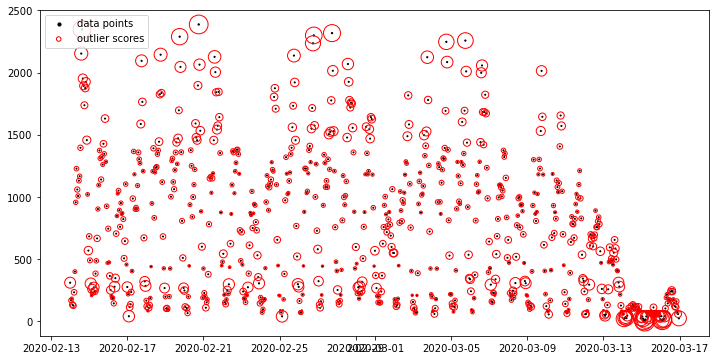

In [5]:
# Calculo normalizado
clf = LocalOutlierFactor(n_neighbors=50)
normalized_df = (trayecto-trayecto.mean())/trayecto.std() # Se hace resta del valor y la media de la columna para después dividir por la desviación estandar
clf.fit_predict(normalized_df)
results = clf.negative_outlier_factor_
trayecto['LOF'] = results.tolist()
# normalized_df.head()
trayecto.query('LOF < -1.5')

plt.figure(figsize=(12, 6))
plt.scatter(trayecto.index,trayecto['2807905-2807901'], c='black', s=trayecto.LOF * -1, label='data points')
radius = (results.max() - results) / (results.max() - results.min())
plt.scatter(trayecto.index,trayecto['2807905-2807901'], s=400 * radius, edgecolors ='r', facecolors='none', label='outlier scores')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

# Eliminar Duplicados

In [6]:
# Contar los duplicados antes de eliminarlos
duplicados = trayecto.duplicated(subset='2807905-2807901').sum()
print(duplicados)
print(trayecto.shape)
# Eliminar los valores duplicados en la columna 'desplazamientos'
trayecto = trayecto.drop_duplicates(subset='2807905-2807901', keep='first')
print(trayecto.shape)

0
(768, 2)
(768, 2)


# Periodo Confinamiento 1

In [7]:
basepath = "/media/jonathan/JHON/Tesis/DatosTesis/Importantes_3erAvance/Trayectos_Periodo_Confinamiento1.csv"
data = pd.read_csv(basepath, sep=',', index_col='ds', parse_dates=True)   
# data.head()
trayecto = data[['2807905-2807901']]
trayecto.head()

,2807905-2807901
ds,
2020-03-17 00:00:00,36.055
2020-03-17 01:00:00,5.483
2020-03-17 02:00:00,17.400
2020-03-17 03:00:00,16.812
2020-03-17 04:00:00,0.000


In [8]:
# lof = LocalOutlierFactor(n_neighbors=40, contamination=0.05)
# outliers = lof.fit_predict(trayecto)
# trayecto['outlier'] = outliers

# plt.figure(figsize=(12, 6))
# plt.plot(trayecto.index, trayecto['2807905-2807901'], label='Desplazamiento')
# plt.scatter(trayecto[trayecto['outlier'] == -1].index, trayecto[trayecto['outlier'] == -1]['2807905-2807901'], color='red', label='Outliers')
# plt.xlabel('Fecha')
# plt.ylabel('Desplazamiento')
# plt.title('Serie Temporal de Desplazamiento con Outliers Identificados por LOF')
# plt.legend()
# plt.show()

# Normalizada

In [9]:
# lof = LocalOutlierFactor(n_neighbors=30, contamination=0.06)
# normalized_df = (trayecto-trayecto.mean())/trayecto.std()
# outliers = lof.fit_predict(normalized_df)
# normalized_df['outlier'] = outliers

# plt.figure(figsize=(12, 6))
# plt.plot(normalized_df.index, normalized_df['2807905-2807901'], label='Desplazamiento')
# plt.scatter(normalized_df[normalized_df['outlier'] == -1].index, normalized_df[normalized_df['outlier'] == -1]['2807905-2807901'], color='red', label='Outliers')
# plt.xlabel('Fecha')
# plt.ylabel('Desplazamiento')
# plt.title('Serie Temporal de Desplazamiento con Outliers Identificados por LOF')
# plt.legend()
# plt.show()

# ScatterPlot

/tmp/ipykernel_11209/248336697.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trayecto['LOF'] = results.tolist()


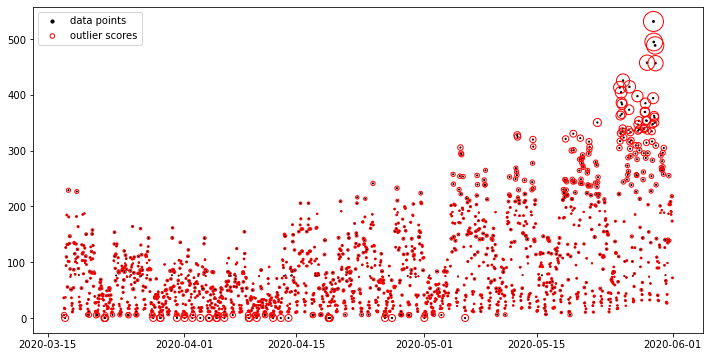

In [10]:
# Calculo normalizado
clf = LocalOutlierFactor(n_neighbors=100)
normalized_df = (trayecto-trayecto.mean())/trayecto.std() # Se hace resta del valor y la media de la columna para después dividir por la desviación estandar
clf.fit_predict(normalized_df)
results = clf.negative_outlier_factor_
trayecto['LOF'] = results.tolist()
# normalized_df.head()
trayecto.query('LOF < -1.5')

plt.figure(figsize=(12, 6))
plt.scatter(trayecto.index,trayecto['2807905-2807901'], c='black', s=trayecto.LOF * -1, label='data points')
radius = (results.max() - results) / (results.max() - results.min())
plt.scatter(trayecto.index,trayecto['2807905-2807901'], s=400 * radius, edgecolors ='r', facecolors='none', label='outlier scores')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

# Eliminar duplicados

In [11]:
duplicados = trayecto.duplicated(subset='2807905-2807901').sum()
print(duplicados)
# trayecto = trayecto.drop_duplicates(subset='2807905-2807901', keep='first')

duplicados = trayecto[trayecto.duplicated(subset=['2807905-2807901'], keep=False)]
duplicados = duplicados[['2807905-2807901']]
# duplicados.head(5)

68


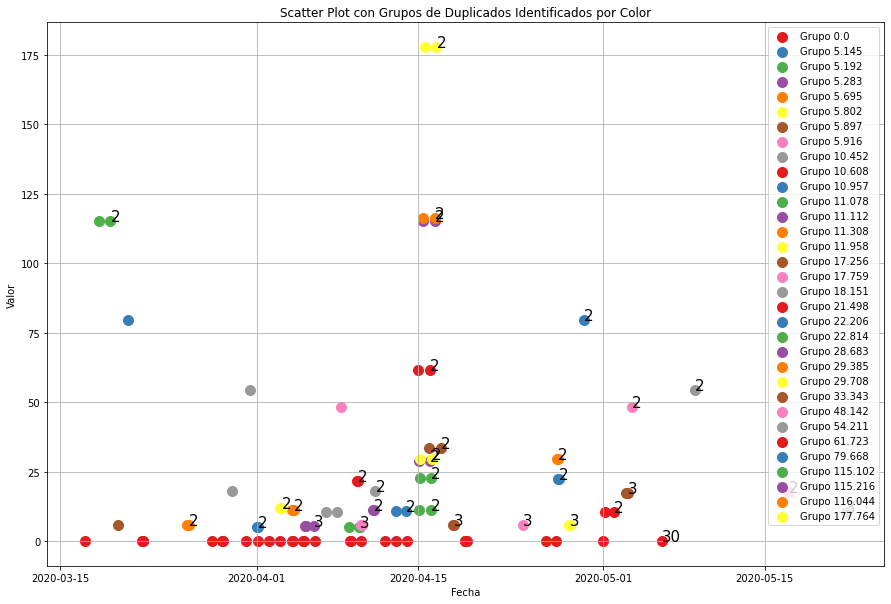

In [12]:
grupos = duplicados.groupby('2807905-2807901')
paleta_colores = sns.color_palette('Set1', n_colors=len(grupos))

# Crear el scatter plot con colores únicos para cada grupo de valores duplicados
plt.figure(figsize=(15, 10))
for i, (grupo, datos_grupo) in enumerate(grupos):
    plt.scatter(datos_grupo.index, datos_grupo['2807905-2807901'], color=paleta_colores[i], label=f'Grupo {grupo}', s=100)
    
    plt.text(datos_grupo.index[-1], datos_grupo['2807905-2807901'].iloc[-1], str(len(datos_grupo)), fontsize=15, color='black')
    
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Scatter Plot con Grupos de Duplicados Identificados por Color')
plt.legend()
plt.grid(True)
plt.show()

# Periodo Confinamiento 2

In [13]:
basepath = "/media/jonathan/JHON/Tesis/DatosTesis/Importantes_3erAvance/Trayectos_Periodo_Confinamiento2.csv"
data = pd.read_csv(basepath, sep=',', index_col='ds', parse_dates=True)   
# data.head()
trayecto = data[['2807905-2807901']]
trayecto.head()

,2807905-2807901
ds,
2020-06-01 00:00:00,77.127
2020-06-01 01:00:00,32.415
2020-06-01 02:00:00,20.189
2020-06-01 03:00:00,46.381
2020-06-01 04:00:00,64.061


In [14]:
# lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
# outliers = lof.fit_predict(trayecto)
# trayecto['outlier'] = outliers

# plt.figure(figsize=(12, 6))
# plt.plot(trayecto.index, trayecto['2807905-2807901'], label='Desplazamiento')
# plt.scatter(trayecto[trayecto['outlier'] == -1].index, trayecto[trayecto['outlier'] == -1]['2807905-2807901'], color='red', label='Outliers')
# plt.xlabel('Fecha')
# plt.ylabel('Desplazamiento')
# plt.title('Serie Temporal de Desplazamiento con Outliers Identificados por LOF')
# plt.legend()
# plt.show()

# Normalizada

In [15]:
# lof = LocalOutlierFactor(n_neighbors=30, contamination=0.06)
# normalized_df = (trayecto-trayecto.mean())/trayecto.std()
# outliers = lof.fit_predict(normalized_df)
# normalized_df['outlier'] = outliers

# plt.figure(figsize=(12, 6))
# plt.plot(normalized_df.index, normalized_df['2807905-2807901'], label='Desplazamiento')
# plt.scatter(normalized_df[normalized_df['outlier'] == -1].index, normalized_df[normalized_df['outlier'] == -1]['2807905-2807901'], color='red', label='Outliers')
# plt.xlabel('Fecha')
# plt.ylabel('Desplazamiento')
# plt.title('Serie Temporal de Desplazamiento con Outliers Identificados por LOF')
# plt.legend()
# plt.show()

# ScatterPlot

/tmp/ipykernel_11209/248336697.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trayecto['LOF'] = results.tolist()


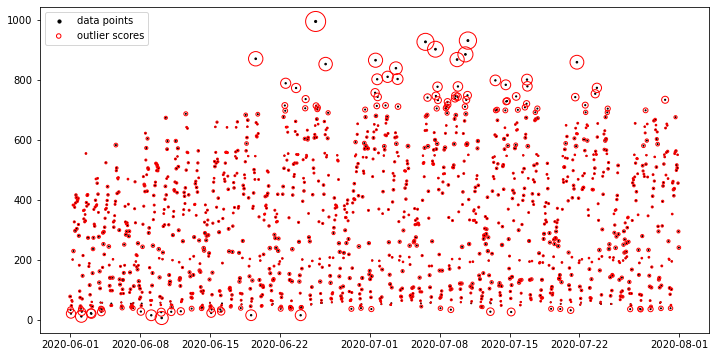

In [16]:
# Calculo normalizado
clf = LocalOutlierFactor(n_neighbors=100)
normalized_df = (trayecto-trayecto.mean())/trayecto.std() # Se hace resta del valor y la media de la columna para después dividir por la desviación estandar
clf.fit_predict(normalized_df)
results = clf.negative_outlier_factor_
trayecto['LOF'] = results.tolist()
# normalized_df.head()
trayecto.query('LOF < -1.5')

plt.figure(figsize=(12, 6))
plt.scatter(trayecto.index,trayecto['2807905-2807901'], c='black', s=trayecto.LOF * -1, label='data points')
radius = (results.max() - results) / (results.max() - results.min())
plt.scatter(trayecto.index,trayecto['2807905-2807901'], s=400 * radius, edgecolors ='r', facecolors='none', label='outlier scores')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

# Eliminar duplicados

In [17]:
duplicados = trayecto.duplicated(subset='2807905-2807901').sum()
print(duplicados)

duplicados = trayecto[trayecto.duplicated(subset=['2807905-2807901'], keep=False)]
duplicados = duplicados[['2807905-2807901']]
duplicados.head()

1


,2807905-2807901
ds,
2020-06-10 02:00:00,48.994
2020-06-14 06:00:00,48.994


# ScatterPlot ''y'' normalizado

In [18]:
# # Calculo normalizado
# clf = LocalOutlierFactor(n_neighbors=100)
# normalized_df = (trayecto-trayecto.mean())/trayecto.std() # Se hace resta del valor y la media de la columna para después dividir por la desviación estandar
# clf.fit_predict(normalized_df)
# results = clf.negative_outlier_factor_
# normalized_df['LOF'] = results.tolist()
# # normalized_df.head()
# normalized_df.query('LOF < -1.5')

# plt.figure(figsize=(12, 6))
# plt.scatter(normalized_df.index,normalized_df['2807905-2807901'], c='black', s=normalized_df.LOF * -1, label='data points')
# radius = (results.max() - results) / (results.max() - results.min())
# plt.scatter(normalized_df.index,normalized_df['2807905-2807901'], s=100 * radius, edgecolors ='r', facecolors='none', label='outlier scores')
# legend = plt.legend(loc='upper left')
# legend.legendHandles[0]._sizes = [10]
# legend.legendHandles[1]._sizes = [20]
# plt.show()

In [19]:
# Presentar el penultimo gráfica. La ultima y la penultima se diferencian en el eje y (Norm y no Norm). 
#Este tipo de gráficas se presentan tipo scatter